In [17]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [18]:
 # Step 1: Load and preprocess the data
data = pd.read_excel("D:\\projects\\project 1st oil price predection\\DCOILWTICO (1).xls")

In [19]:
data

,Date,Price
0,2012-04-02,105.25
1,2012-04-03,104.02
2,2012-04-04,101.53
3,2012-04-05,103.29
4,2012-04-06,NaN
...,...,...
2916,2023-06-06,71.71
2917,2023-06-07,72.52
2918,2023-06-08,71.28
2919,2023-06-09,70.16


In [20]:
data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' column to datetime
data = data.set_index('Date')  # Set 'Date' column as index

In [21]:
# Step 2: Handling missing values
data = data.dropna()  # Remove rows with missing values

In [22]:
# Step 3: Handling negative values
data['Price'] = data['Price'].abs()  # Convert negative values to positive

# Step: Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Price'] = scaler.fit_transform(data[['Price']])

In [23]:
# Step 4: Split the data into training and testing sets
X = data.index.values.reshape(-1, 1)  # Convert date index to a 2D array
y = data['Price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Step 5: Create and train the SVR model
svr = SVR(kernel='rbf')  # You can choose a different kernel if desired
svr.fit(X_train, y_train)

SVR()

In [25]:
# Step 6: Predict oil prices
y_pred = svr.predict(X_test)

In [26]:
# Step 7: Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.4032288492664978


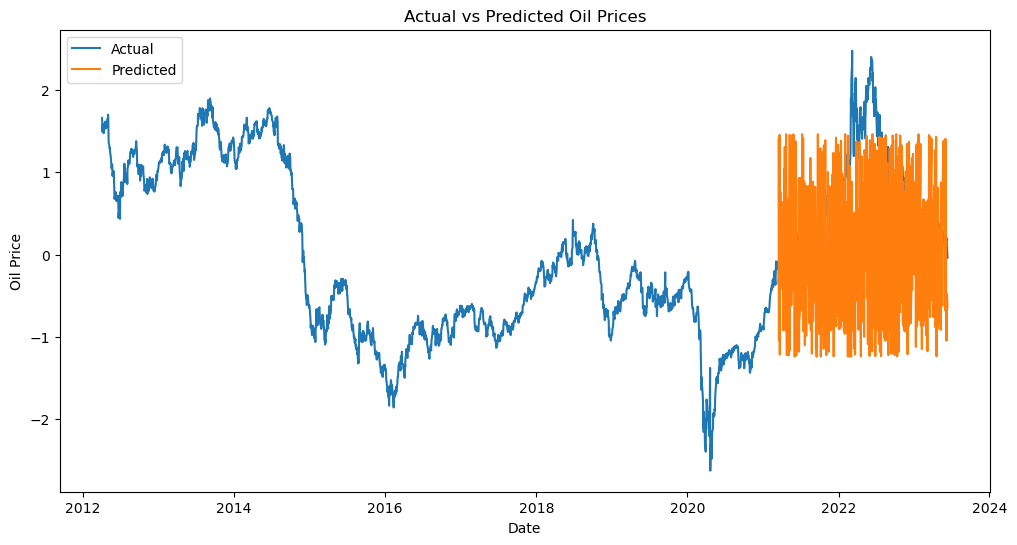

In [27]:
# Step 8: Plot actual vs predicted oil prices
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Price'], label='Actual')
plt.plot(data.index[X_train.shape[0]:], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Actual vs Predicted Oil Prices')
plt.legend()
plt.show()

In [28]:
# Step 9: Future prediction
future_dates = pd.date_range(start=data.index[-1], periods=10, freq='D')  # Adjust the number of periods as desired
future_dates = future_dates[1:]  # Exclude the current date
future_dates = future_dates.to_numpy().reshape(-1, 1)
future_pred = svr.predict(future_dates)

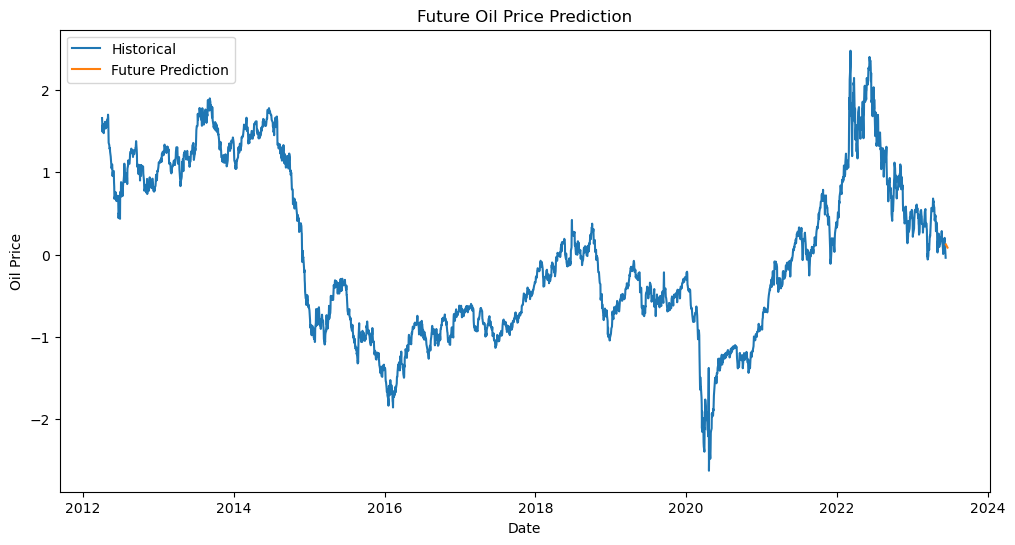

In [29]:
# Step 10: Plot future predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Price'], label='Historical')
plt.plot(future_dates, future_pred, label='Future Prediction')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Future Oil Price Prediction')
plt.legend()
plt.show()

In [30]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")

Root Mean Squared Error (RMSE): 0.4032288492664978
Mean Squared Error (MSE): 0.162593504880784


Root Mean Squared Error (RMSE): The RMSE value of 0.4032288492664978 represents the average prediction error of the SVR model. It measures the square root of the average squared difference between the predicted and actual values. Lower RMSE values indicate better predictive performance, so having a low RMSE suggests that the SVR model has relatively accurate predictions.

Mean Squared Error (MSE): The MSE value of 0.162593504880784 represents the average squared difference between the predicted and actual values. It quantifies the overall magnitude of the prediction errors. Lower MSE values indicate better model performance.

In conclusion, based on the provided data, you can conclude that the SVR model performs reasonably well, as indicated by the relatively low RMSE and MSE values. However, it's important to consider other factors such as the specific requirements of your prediction task, the scale of the target variable, and the performance of other models for a comprehensive evaluation and final determination.